In [1]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Experimenatal_train dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Experimental_validate_dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 3782 images belonging to 4 classes.
Found 1377 images belonging to 4 classes.


In [4]:
model = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(150, 150, 3), padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    GlobalAveragePooling2D(),

    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),

    Dense(4, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 18, 18, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 9, 9, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 9, 9, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 256)           │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,263,556 (12.45 MB)

 Trainable params: 3,261,828 (12.44 MB)

 Non-trainable params: 1,728 (6.75 KB)

In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples,
    epochs=60,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples,
    callbacks=[lr_scheduler] )

Epoch 1/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.9695 - loss: 0.2068 - val_accuracy: 0.9528 - val_loss: 0.2700 - learning_rate: 9.7656e-06
Epoch 2/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 353ms/step - accuracy: 0.9375 - loss: 0.3206 - val_accuracy: 0.9535 - val_loss: 0.2697 - learning_rate: 9.7656e-06
Epoch 3/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.9649 - loss: 0.2151 - val_accuracy: 0.9440 - val_loss: 0.2803 - learning_rate: 9.7656e-06
Epoch 4/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 346ms/step - accuracy: 0.9062 - loss: 0.2999 - val_accuracy: 0.9440 - val_loss: 0.2800 - learning_rate: 9.7656e-06
Epoch 5/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 831ms/step - accuracy: 0.9652 - loss: 0.2198
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.882812390860636e-06.
118/118 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9652 - loss: 0.2197 - val_accuracy: 0.9499 - val_loss: 0.2766 - learning_rate: 9.7656e-06
Epoch 6/60
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 352ms/step - a

In [7]:
train_loss, train_accuracy = model.evaluate(train_generator)
print(f'Training accuracy: {train_accuracy*100:.2f}%')


val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {val_accuracy*100:.2f}%')

119/119 ━━━━━━━━━━━━━━━━━━━━ 96s 800ms/step - accuracy: 0.9792 - loss: 0.1781
Training accuracy: 98.36%
44/44 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9578 - loss: 0.2531
Validation accuracy: 94.84%


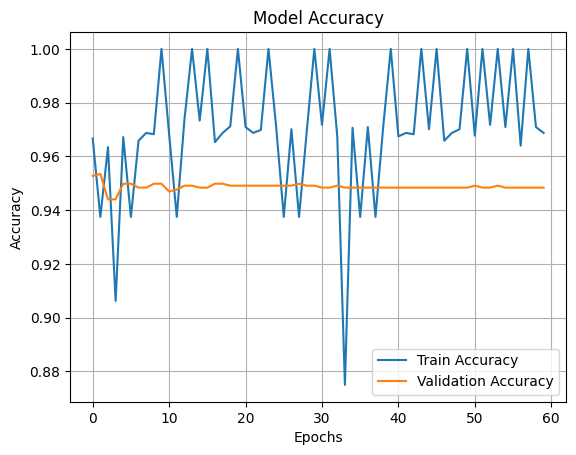

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

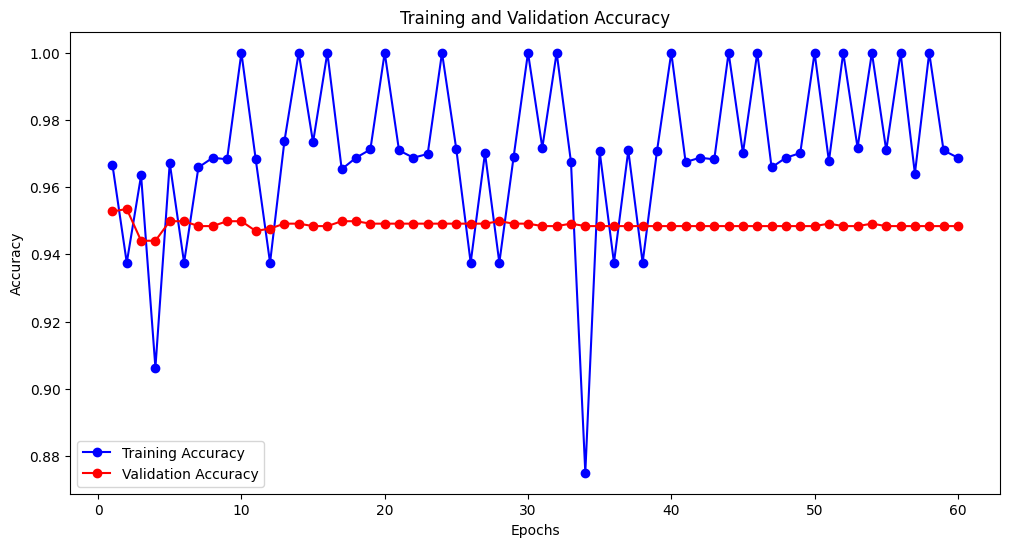

The model seems to be fitting well. Training and validation accuracy are close.


In [10]:
import matplotlib.pyplot as plt


def plot_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


    if val_acc[-1] < acc[-1] and (acc[-1] - val_acc[-1]) > 0.1:
        print("The model is likely overfitting. Training accuracy is much higher than validation accuracy.")
    elif acc[-1] < 0.6 and val_acc[-1] < 0.6:
        print("The model is likely underfitting. Both training and validation accuracy are low.")
    elif abs(acc[-1] - val_acc[-1]) <= 0.1:
        print("The model seems to be fitting well. Training and validation accuracy are close.")
    else:
        print("Model performance is unclear, consider checking the learning rate and data quality.")


plot_accuracy(history)

In [9]:
model.save('/content/drive/MyDrive/My model/Disaster(iiser).h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: flood
Confidence: 0.88


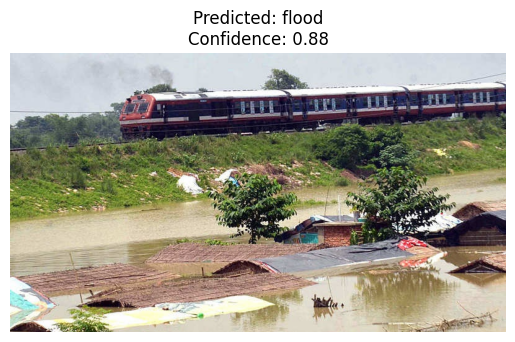

In [11]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


model = tf.keras.models.load_model('/content/drive/MyDrive/My model/Disaster(iiser).h5')


class_labels = ['Forest Fire', 'drought', 'earthquake', 'flood']  # Modify as needed

def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def predict_image(img_path):
    """
    Predicts the class of the given image.
    """
    processed_img = preprocess_image(img_path)
    predictions = model.predict(processed_img)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions)

    print(f'Predicted Class: {class_labels[predicted_class]}')
    print(f'Confidence: {confidence:.2f}')


    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f'Predicted: {class_labels[predicted_class]}\nConfidence: {confidence:.2f}')
    plt.axis('off')
    plt.show()

image_path = '/content/drive/MyDrive/Experimental_validate_dataset/flood/1003.jpg'
predict_image(image_path)


Found 3782 images belonging to 4 classes.
Found 1377 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


119/119 ━━━━━━━━━━━━━━━━━━━━ 83s 687ms/step


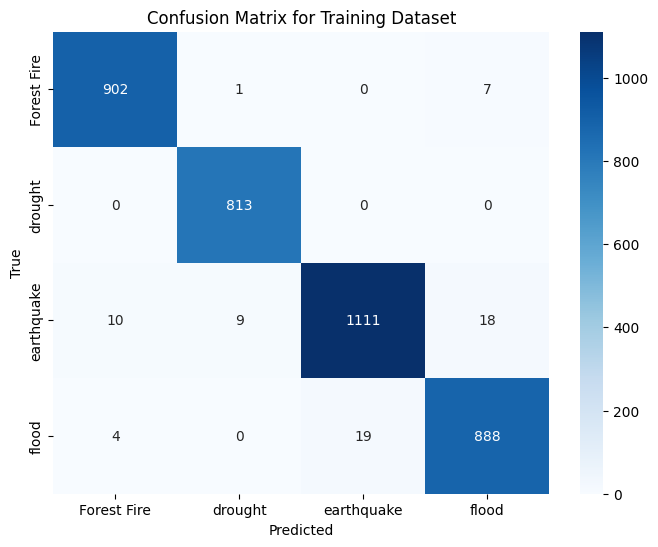

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step


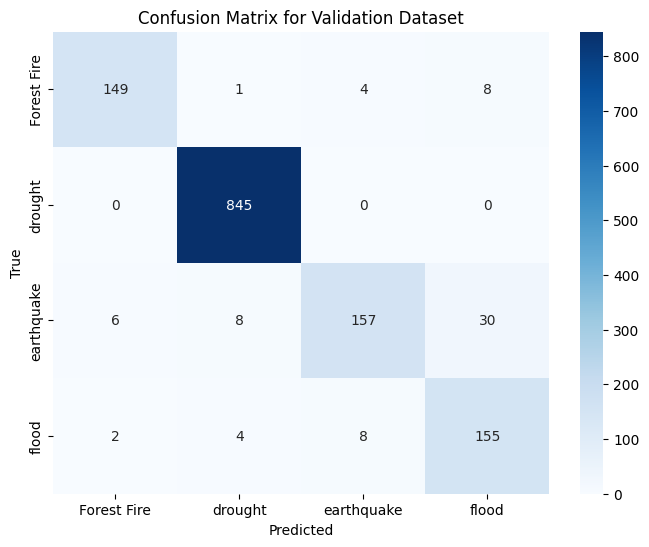

Classification Report for Training Dataset:
               precision    recall  f1-score   support

 Forest Fire       0.98      0.99      0.99       910
     drought       0.99      1.00      0.99       813
  earthquake       0.98      0.97      0.98      1148
       flood       0.97      0.97      0.97       911

    accuracy                           0.98      3782
   macro avg       0.98      0.98      0.98      3782
weighted avg       0.98      0.98      0.98      3782

Classification Report for Validation Dataset:
               precision    recall  f1-score   support

 Forest Fire       0.95      0.92      0.93       162
     drought       0.98      1.00      0.99       845
  earthquake       0.93      0.78      0.85       201
       flood       0.80      0.92      0.86       169

    accuracy                           0.95      1377
   macro avg       0.92      0.90      0.91      1377
weighted avg       0.95      0.95      0.95      1377



In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model


model = load_model('/content/drive/MyDrive/My model/Disaster(iiser).h5')


datagen = ImageDataGenerator(rescale=1./255)


train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Experimenatal_train dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Experimental_validate_dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


class_indices = train_generator.class_indices
class_labels = list(class_indices.keys())


def plot_confusion_matrix(true_labels, predicted_labels, dataset_type):
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {dataset_type} Dataset')
    plt.show()


train_predictions = model.predict(train_generator, steps=len(train_generator), verbose=1)

train_predicted_labels = np.argmax(train_predictions, axis=1)
train_true_labels = train_generator.classes


plot_confusion_matrix(train_true_labels, train_predicted_labels, 'Training')


validation_predictions = model.predict(validation_generator, steps=len(validation_generator), verbose=1)

validation_predicted_labels = np.argmax(validation_predictions, axis=1)
validation_true_labels = validation_generator.classes


plot_confusion_matrix(validation_true_labels, validation_predicted_labels, 'Validation')


print("Classification Report for Training Dataset:\n",
      classification_report(train_true_labels, train_predicted_labels, target_names=class_labels))

print("Classification Report for Validation Dataset:\n",
      classification_report(validation_true_labels, validation_predicted_labels, target_names=class_labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
Predicted Class: flood
Confidence: 0.98


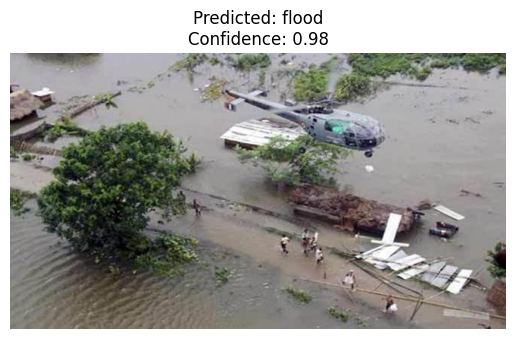

In [15]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


model = tf.keras.models.load_model('/content/drive/MyDrive/My model/Disaster(iiser).h5')


class_labels = ['Forest Fire', 'drought', 'earthquake', 'flood']

def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def analyze_severity(img_path):
    processed_img = preprocess_image(img_path)
    predictions = model.predict(processed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions)

    predicted_class_label = class_labels[predicted_class_index]

    print(f'Predicted Class: {predicted_class_label}')
    print(f'Confidence: {confidence:.2f}')


    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class_label}\nConfidence: {confidence:.2f}')
    plt.axis('off')
    plt.show()

image_path = '/content/drive/MyDrive/Experimental_validate_dataset/flood/1002.jpg'
analyze_severity(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
Predicted Class: flood
Severity Level: High
Confidence: 0.98


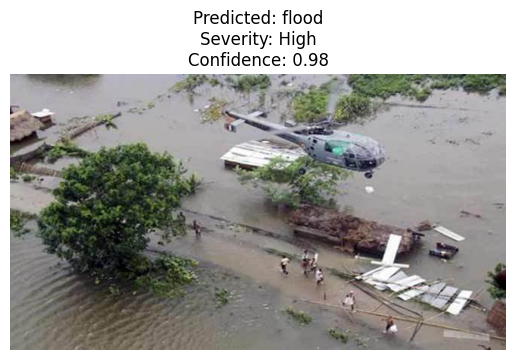

In [16]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


model = tf.keras.models.load_model('/content/drive/MyDrive/My model/Disaster(iiser).h5')


class_labels = ['Forest Fire', 'drought', 'earthquake', 'flood']
severity_labels = ['Low', 'Medium', 'High']

def preprocess_image(img_path, target_size=(224, 224)):
    """
    Preprocesses the input image to the required format for the model.
    """
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def analyze_severity(img_path):
    processed_img = preprocess_image(img_path)
    predictions = model.predict(processed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions)

    predicted_class_label = class_labels[predicted_class_index]


    if confidence > 0.7:
        severity = 'High'
    elif confidence > 0.4:
        severity = 'Medium'
    else:
        severity = 'Low'

    print(f'Predicted Class: {predicted_class_label}')
    print(f'Severity Level: {severity}')
    print(f'Confidence: {confidence:.2f}')


    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class_label}\nSeverity: {severity}\nConfidence: {confidence:.2f}')
    plt.axis('off')
    plt.show()

image_path = '/content/drive/MyDrive/Experimental_validate_dataset/flood/1002.jpg'
analyze_severity(image_path)
